<a href="https://colab.research.google.com/github/jensilathiya10/iris-classification-ml/blob/main/iris_pw24_dss_se.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries



#Mount drive via code




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#alternatively you can mount by clicking the button on the left

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd  #checking our present working directory
%ls  #listing the files in the current directory
#%cd '/content/drive/MyDrive/Colab Notebooks' - if we upload the iris file in the same folder as the notebook, we still need to go to the folder

drive/  sample_data/


# Read File

In [ ]:
%cd '/content/drive/MyDrive/GUS/pw24 - dss' #this is where we uploaded our iris dataset
%ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/GUS/pw24 - dss #this is where we uploaded our iris dataset'
/content
drive/  sample_data/


# Import Libraries

In [ ]:
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




# Load Data

In [ ]:

#reading file from drive
#data_v1=read_csv('Iris.csv')
#print (data_v1)

#OR - reading file from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal_length', 'sepal-width', 'petal-length', 'petal-width', 'category']
data=read_csv(url,names=names)
data

,sepal_length,sepal-width,petal-length,petal-width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


,0
category,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


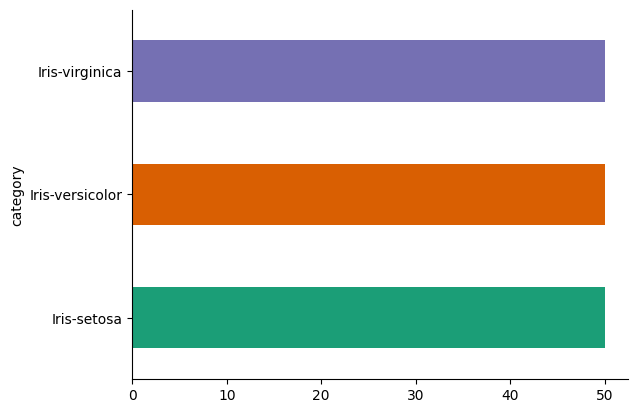

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

data.groupby('category').size()

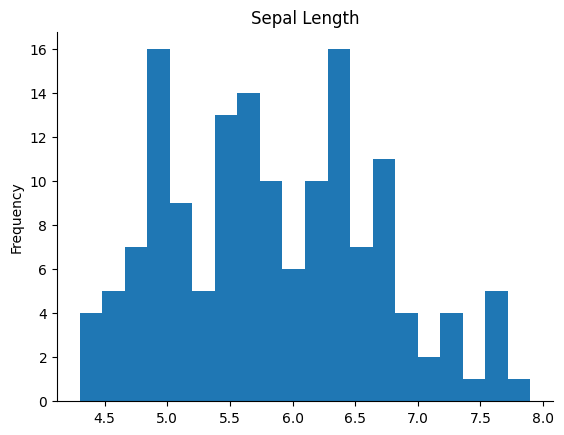

In [ ]:
# @title sepal_length

from matplotlib import pyplot as plt
data['sepal_length'].plot(kind='hist', bins=20, title='Sepal Length')
plt.gca().spines[['top', 'right',]].set_visible(False)


# Explore Data


In [ ]:
print (data.shape)

print (data.head(10))
print (data.tail())
print(data.describe())
print(data.groupby('category').size())

(150, 5)
   sepal_length  sepal-width  petal-length  petal-width     category
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal_length  sepal-width  petal-length  petal-width        category
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147       

# Visualizations

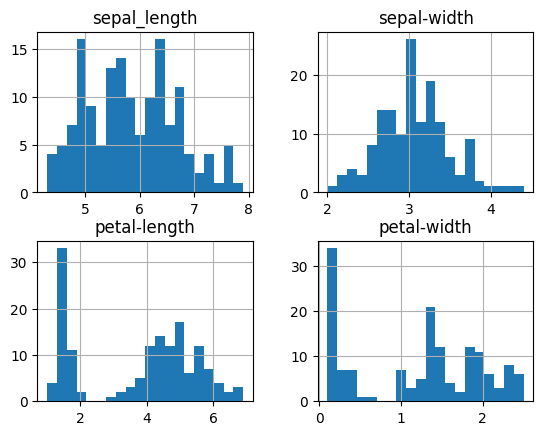

In [ ]:
data.hist(bins=20)
plt.show()

# Missing Values

In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal-width,0
petal-length,0
petal-width,0
category,0


# Reading file with missing data

In [ ]:
data_missing=read_csv('Iris-missing.csv')
print (data_missing)
data_missing.shape
data_missing.isnull().head(30)

print (data_missing.loc[data_missing['SepalLengthCm'].isnull()==True])
data_missing.loc[data_missing['SepalWidthCm'].isnull()==True]




FileNotFoundError: [Errno 2] No such file or directory: 'Iris-missing.csv'

# Partitioning the Data

In [ ]:
array = data.values
X = array[:,0:4]
y = array[:,4]

#print (X)
#print (y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Model Creation and Training

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_results

model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Evaluate predictions

print (Y_validation)
print (predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
0.83333

# Assigment 3 - Exploring more models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
print (models)
models.append(('LR', LogisticRegression(solver='liblinear')))
print (models)
models.append(('LDA', LinearDiscriminantAnalysis()))
print (models)

models.append(('KNN', KNeighborsClassifier()))
print (models)
models.append(('CART-default', DecisionTreeClassifier()))
print (models)
models.append(('CART-customized', DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=100)))
print (models)
models.append(('NB', GaussianNB()))
print (models)
models.append(('SVM', SVC(gamma='auto')))
print (models)


results = []
names = []



for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('=======================')
	print(name)
	print(cv_results)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

[]
[('LR', LogisticRegression(solver='liblinear'))]
[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis())]
[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier())]
[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART-default', DecisionTreeClassifier())]
[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART-default', DecisionTreeClassifier()), ('CART-customized', DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=100))]
[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART-default', DecisionTreeClassifier()), ('CART-customized', DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=100)), ('NB', GaussianNB())]
[('LR', LogisticRegression(solver='liblinear')), (

Predictions using Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=100)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



explored bbbbbbbb